<a href="https://colab.research.google.com/github/Priyanka5810/700744635/blob/main/PROJECT_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title IDENTIFICATION AND PREDICTION OF HEART DISEASE


In [ ]:
# @title 1 IMPORTING ESSENTIAL LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


In [ ]:
# @title 2 IMPORTING THE DATASET
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read the CSV file
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv', encoding='ISO-8859-1')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title  Verifying it as a 'dataframe' object in pandas
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
# @title Shape of Dataset
dataset.shape

(303, 14)

In [ ]:
# @title Printing out a few columns
dataset.head(5)

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5)

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [ ]:
# @title Description
dataset.describe()


,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ï»¿age    303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# @title Luckily, we have no missing values

In [ ]:
# @title Let's understand columns better:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

ï»¿age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
# @title Analysing the 'target' variable
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
dataset["target"].unique()

array([1, 0])

In [ ]:
# @title  Clearly, this is a classification problem, with the target variable having values '0' and '1'


In [ ]:
# @title Checking correlation between columns
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
ï»¿age      0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


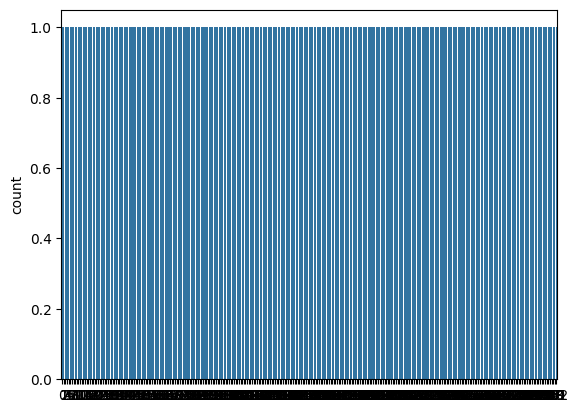

In [ ]:
# @title 3 Exploratory Data Analysis(EDA)
# @markdown First, analysing the target variable:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read the CSV file
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv', encoding='ISO-8859-1')

# Plotting the countplot
y = dataset["target"]
sns.countplot(y)
plt.show()


In [ ]:
# Assuming target_temp contains the counts of patients with and without heart problems
target_temp = [len(dataset[dataset['target'] == 0]), len(dataset[dataset['target'] == 1])]

percentage_without_heart_problems = round(target_temp[0] * 100 / len(dataset), 2)
percentage_with_heart_problems = round(target_temp[1] * 100 / len(dataset), 2)

print("Percentage of patients without heart problems: " + str(percentage_without_heart_problems))
print("Percentage of patients with heart problems: " + str(percentage_with_heart_problems))


Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46


In [ ]:
# @title We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features
# @markdown Analysing the sex feature
dataset["sex"].unique()

array([1, 0])

In [ ]:
# @title We notice, that as expected, the 'sex' feature has 2 unique features


In [ ]:
# @title Analysing the 'Chest Pain Type' feature
dataset["cp"].unique()


array([3, 2, 1, 0])

In [ ]:
#As expected, the CP feature has values from 0 to 3
#We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems


In [ ]:
# @title Analysing the FBS Feature
dataset["fbs"].describe()


count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [ ]:
dataset["fbs"].unique()

array([1, 0])

In [ ]:
# @title Analysing the restcg feature
dataset["restecg"].unique()


array([0, 1, 2])

In [ ]:
#We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

In [ ]:
# @title Analysing the 'exang' feature
dataset["exang"].unique()


array([0, 1])

In [ ]:
#People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

In [ ]:
# @title Analysing the Slope feature
dataset["slope"].unique()


array([0, 2, 1])

In [ ]:
#We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

In [ ]:
# @title Analysing the 'ca' feature

#number of major vessels (0-3) colored by flourosopy

dataset["ca"].unique()




array([0, 2, 1, 3, 4])

<Axes: ylabel='count'>

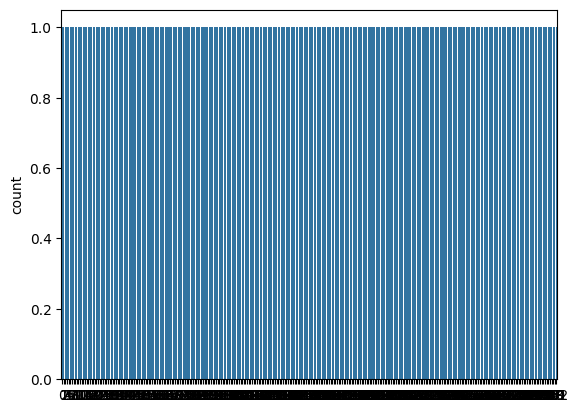

In [ ]:
sns.countplot(dataset["ca"])

In [ ]:
# ca=4 has astonishingly large number of heart patients

In [ ]:
# @title Analysing the 'thal' feature
dataset["thal"].unique()

array([1, 2, 3, 0])

<ipython-input-36-a881bffaf3de>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["thal"])


<Axes: xlabel='thal', ylabel='Density'>

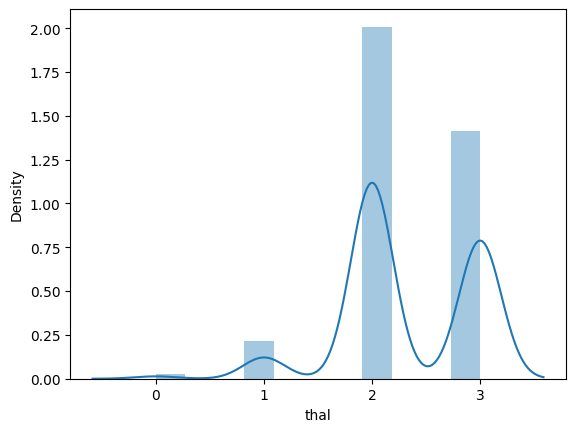

In [ ]:
sns.distplot(dataset["thal"])

In [ ]:
# @title 4 Train the Test Split

from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)


In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape

(242,)

In [ ]:
Y_test.shape

(61,)

In [ ]:
# @title 5 MODEL FITTING
from sklearn.metrics import accuracy_score


In [ ]:
# @title Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Y_pred_lr.shape

(61,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [ ]:
# @title Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)


In [ ]:
Y_pred_nb.shape

(61,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [ ]:
# @title SVM
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)


In [ ]:
Y_pred_svm.shape

(61,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [ ]:
# @title K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)


In [ ]:
Y_pred_knn.shape

(61,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [ ]:
# @title Decision Tree

from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)


In [ ]:
print(Y_pred_dt.shape)

(61,)


In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [ ]:
# @title Random Forest
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

(61,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 86.89 %


In [ ]:
# @title XGR Boost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)


In [ ]:
Y_pred_xgb.shape

(61,)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.61 %


In [ ]:
# @title Neural Network
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 2s 5ms/step - loss: 167.3159 - accuracy: 0.4587
Epoch 2/300
8/8 [==============================] - 0s 4ms/step - loss: 157.0878 - accuracy: 0.4587
Epoch 3/300
8/8 [==============================] - 0s 5ms/step - loss: 147.3631 - accuracy: 0.4587
Epoch 4/300
8/8 [==============================] - 0s 3ms/step - loss: 137.7478 - accuracy: 0.4587
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 128.5939 - accuracy: 0.4587
Epoch 6/300
8/8 [==============================] - 0s 3ms/step - loss: 119.4595 - accuracy: 0.4587
Epoch 7/300
8/8 [==============================] - 0s 3ms/step - loss: 110.9052 - accuracy: 0.4587
Epoch 8/300
8/8 [==============================] - 0s 3ms/step - loss: 102.2959 - accuracy: 0.4587
Epoch 9/300
8/8 [==============================] - 0s 3ms/step - loss: 94.0738 - accuracy: 0.4587
Epoch 10/300
8/8 [==============================] - 0s 3ms/step - loss: 85.9206 - accuracy: 0.4587
Epoch 11/30

In [ ]:
Y_pred_nn = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


In [ ]:
Y_pred_nn.shape

(61, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 78.69 %


In [ ]:
# @title 6 COMPARISON RESULTS
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")


The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 86.89 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 78.69 %
